In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

In [104]:
data = np.random.exponential(scale=2, size=1000)
df = pd.DataFrame({"Salary": data})

In [105]:
df.head()

,Salary
0,0.361147
1,6.702893
2,1.368599
3,1.903097
4,2.478190


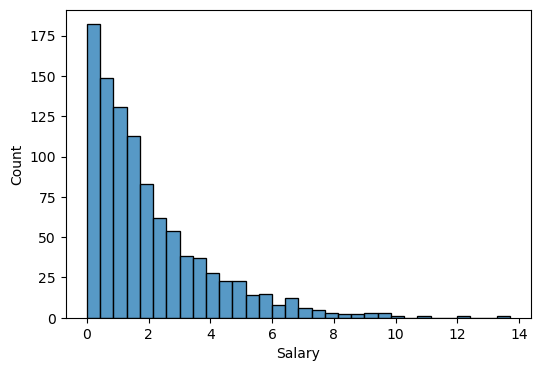

In [106]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary)
plt.show()

In [107]:
df.Salary.skew()

np.float64(1.754951840884393)

In [108]:
df["Updated_Salary"], lambda_val = boxcox(df.Salary)

In [109]:
df.head()

,Salary,Updated_Salary
0,0.361147,-0.886586
1,6.702893,2.509870
2,1.368599,0.327929
3,1.903097,0.704846
4,2.478190,1.032730


In [110]:
lambda_val

np.float64(0.2789275322418997)

In [111]:
df.Updated_Salary.skew()

np.float64(-0.042637254330646114)

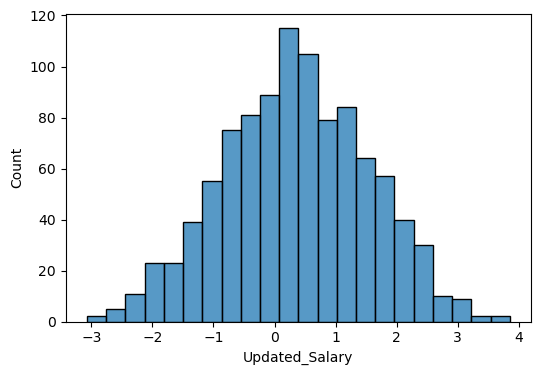

In [112]:
plt.figure(figsize=(6,4))
sns.histplot(df.Updated_Salary)
plt.show()

In [113]:
data = np.random.exponential(scale=2, size=1000)
data = 10 - data
df = pd.DataFrame({"Salary2": data})

In [114]:
df.head()

,Salary2
0,8.115243
1,8.053444
2,9.819005
3,8.358218
4,8.584959


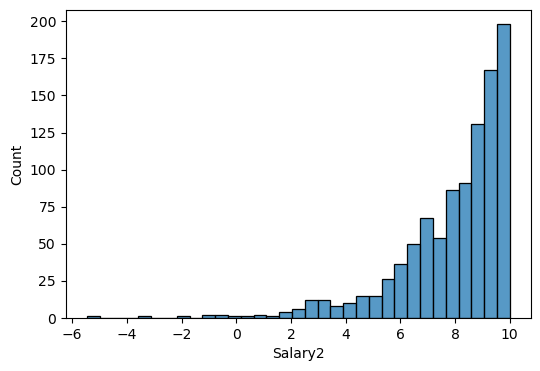

In [115]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [116]:
df.Salary2.skew()

np.float64(-1.8955116113926591)

In [117]:
df["Reflex_Salary"] = (df.Salary2.max() - df.Salary2) + 1

In [118]:
df.head()

,Salary2,Reflex_Salary
0,8.115243,2.883556
1,8.053444,2.945356
2,9.819005,1.179795
3,8.358218,2.640582
4,8.584959,2.413841


In [119]:
max(df.Reflex_Salary), min(df.Reflex_Salary)

(16.452787036216282, 1.0)

In [120]:
df["Transformed_Salary"] = np.log(df.Reflex_Salary) 

In [121]:
df.Transformed_Salary.skew()

np.float64(0.4130361013411308)

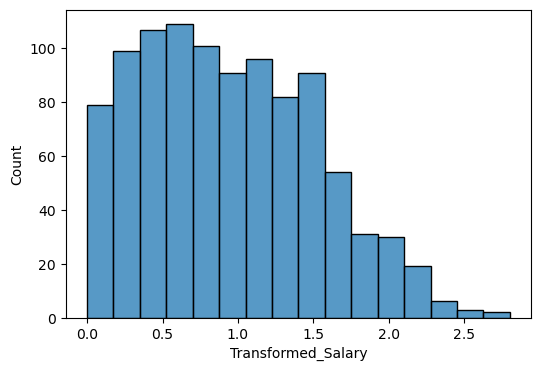

In [122]:
plt.figure(figsize=(6,4))
sns.histplot(df.Transformed_Salary)
plt.show()

In [123]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [124]:
data = pd.read_csv(r"C:\Users\user\Downloads\test2.csv")
data

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN
5,5,Alice,25.0,HR,50000.0


In [125]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN


In [126]:
data.shape

(6, 5)

In [127]:
data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Salary"] = data["Salary"].fillna(data["Salary"].mean())

In [128]:
data

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,28.8,IT,62000.0
4,4,Eve,29.0,HR,58400.0
5,5,Alice,25.0,HR,50000.0


In [129]:
encoder =LabelEncoder()
data["Transformed_name"]  = encoder.fit_transform(data.Name)

In [130]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,Transformed_name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,28.8,IT,62000.0,3
4,4,Eve,29.0,HR,58400.0,4


In [131]:
encoder2 = OneHotEncoder(sparse_output = False)

In [132]:
encoded = encoder2.fit_transform(data[["Department"]])

In [133]:
encoder2.get_feature_names_out()

array(['Department_Finance', 'Department_HR', 'Department_IT'],
      dtype=object)

In [134]:
encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [135]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [136]:
scaler = StandardScaler()

In [137]:
data["Scaled_Salary"] = scaler.fit_transform(data[["Salary"]])

In [138]:
data.head()

,Unnamed: 0,Name,Age,Department,Salary,Transformed_name,Scaled_Salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755
1,1,Bob,30.0,IT,60000.0,1,0.229668
2,2,Charlie,35.0,Finance,70000.0,2,1.665091
3,3,David,28.8,IT,62000.0,3,0.516752
4,4,Eve,29.0,HR,58400.0,4,0.000000


In [139]:
min_max_scaler = MinMaxScaler()

In [140]:
data["Min_Max_Scaled_Salary"] = min_max_scaler.fit_transform(data[["Salary"]])

In [141]:
data

,Unnamed: 0,Name,Age,Department,Salary,Transformed_name,Scaled_Salary,Min_Max_Scaled_Salary
0,0,Alice,25.0,HR,50000.0,0,-1.205755,0.00
1,1,Bob,30.0,IT,60000.0,1,0.229668,0.50
2,2,Charlie,35.0,Finance,70000.0,2,1.665091,1.00
3,3,David,28.8,IT,62000.0,3,0.516752,0.60
4,4,Eve,29.0,HR,58400.0,4,0.000000,0.42
5,5,Alice,25.0,HR,50000.0,0,-1.205755,0.00


In [142]:
data = pd.read_csv(r"C:\Users\user\Downloads\data_visualization.csv")
data

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14
5,5,6,Meera,Female,ECE,22,76,79,88,9
6,6,7,Kiran,Male,CS,21,92,94,96,16
7,7,8,Ananya,Female,IT,20,81,83,89,11
8,8,9,Rahul,Male,ECE,22,74,72,75,7
9,9,10,Isha,Female,CS,23,89,91,93,15


<Figure size 640x480 with 0 Axes>

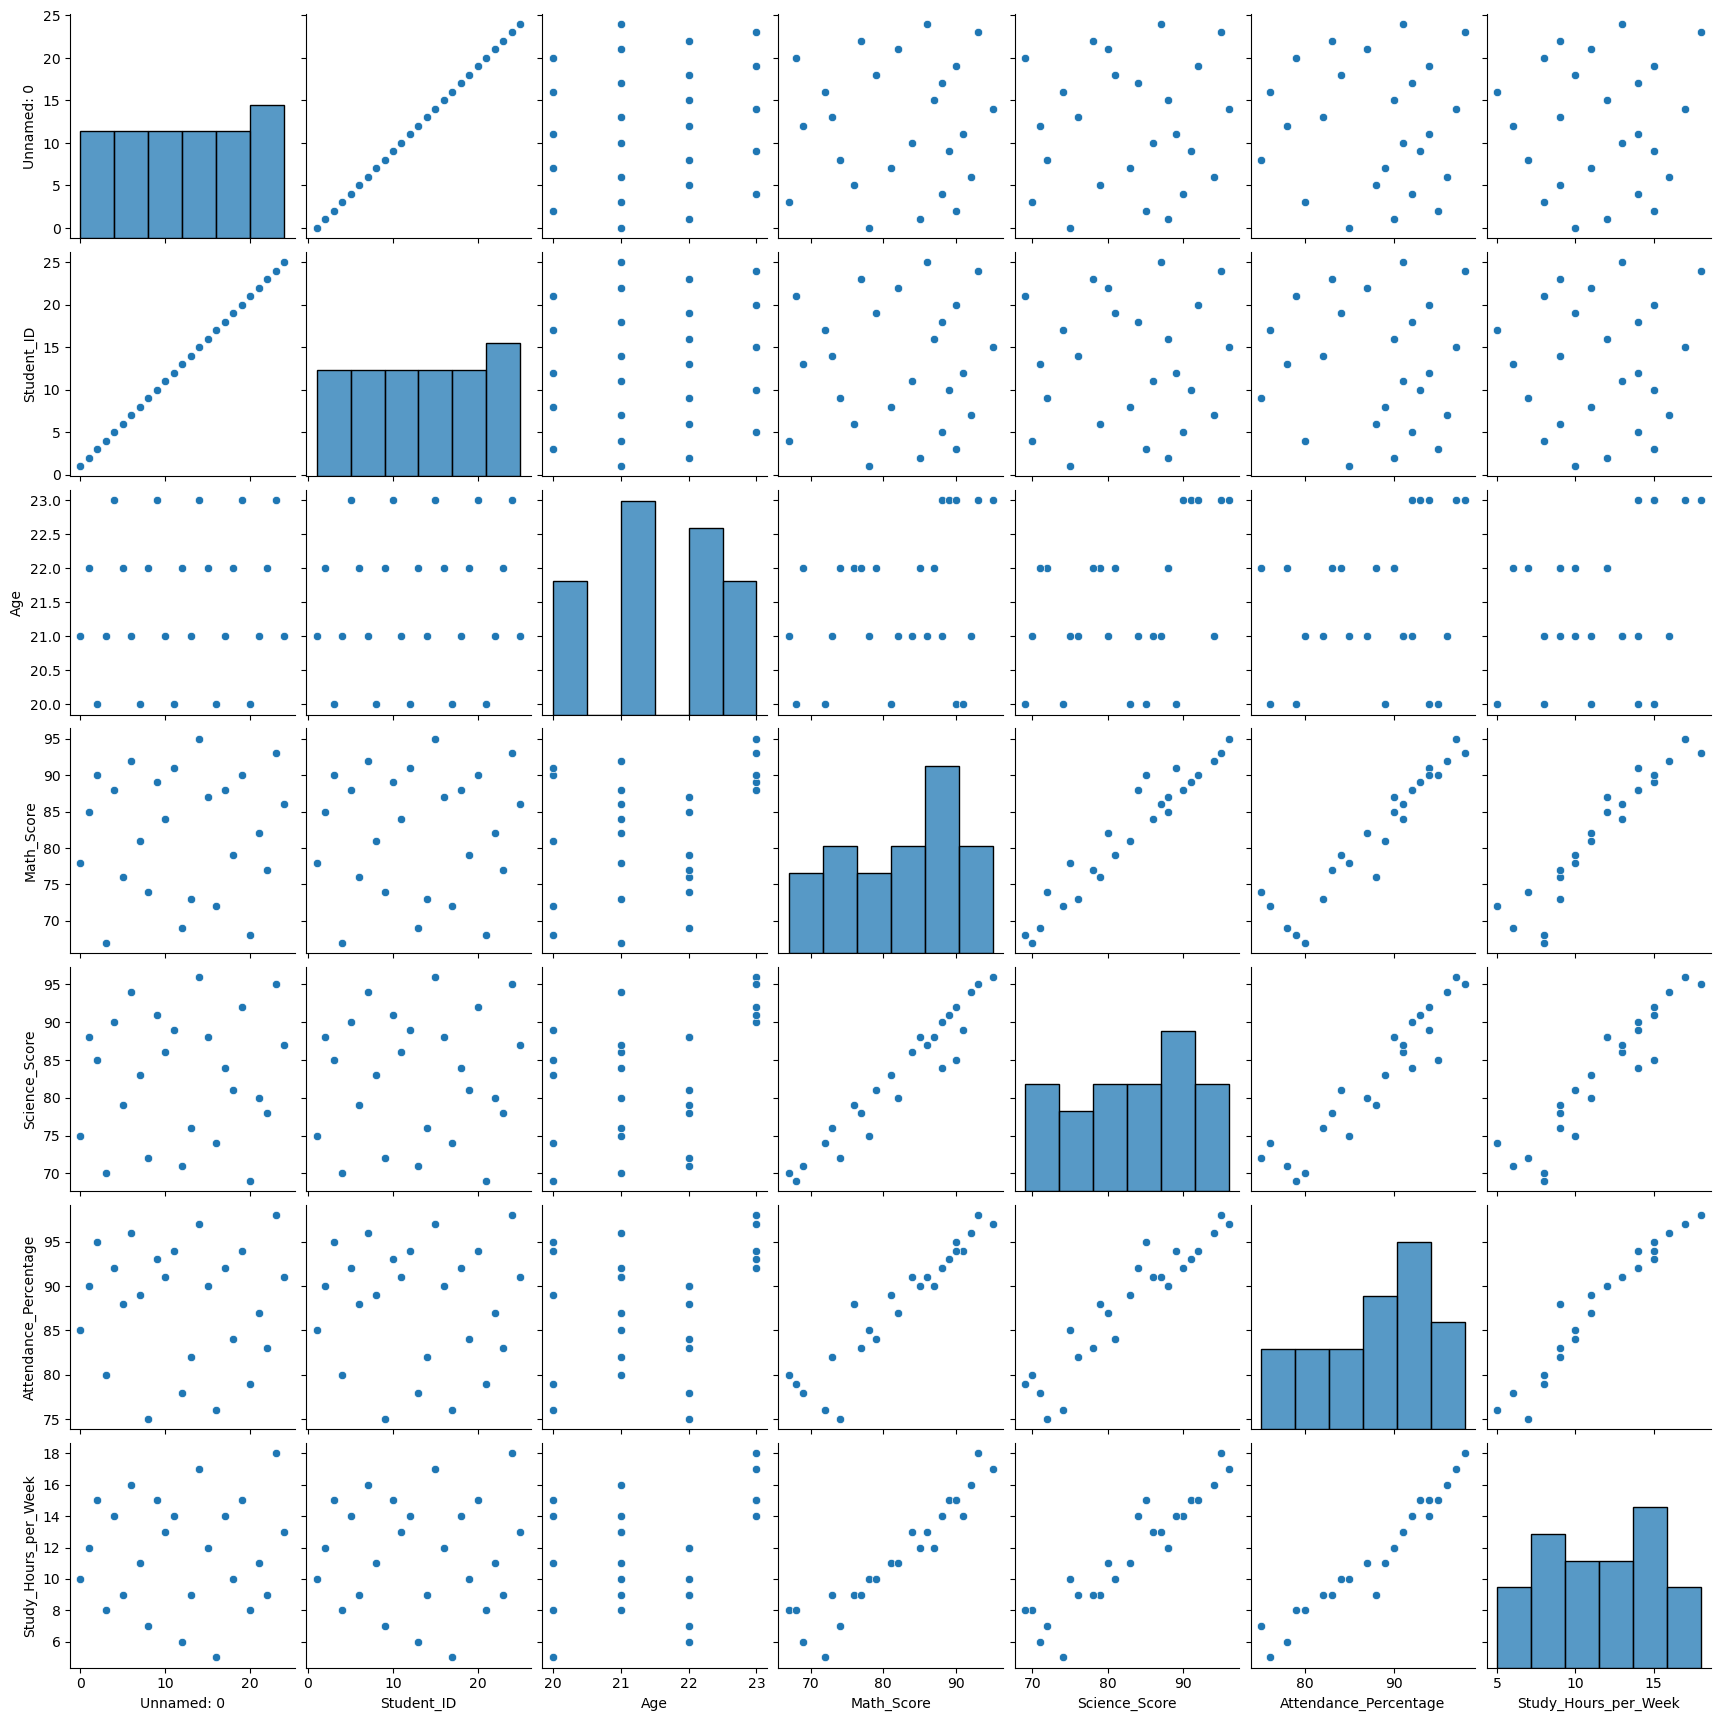

In [143]:
plt.figure()
sns.pairplot(data)

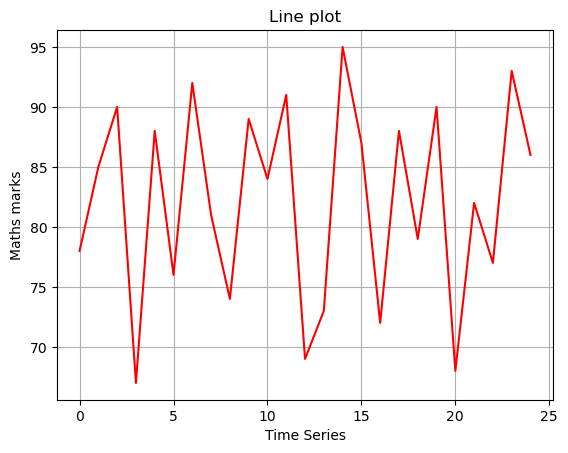

In [148]:
plt.plot(data.Math_Score, color="red")
plt.grid()
plt.title('Line plot')
plt.xlabel('Time Series')
plt.ylabel('Maths marks')
plt.show()